# Humans Emotion Detection Using Transfer Learning --> Hyperparameter Tuning

Accuracy very bad under 60% at 10 epochs

In [ ]:
!pip install -q kaggle

from google.colab import files
files.upload()

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d ananthu017/emotion-detection-fer

100% 65.0M/65.2M [00:02<00:00, 43.4MB/s]
100% 65.2M/65.2M [00:02<00:00, 30.9MB/s]


In [3]:
!unzip /content/emotion-detection-fer.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/im37.png      
  inflating: train/sad/im370.png     
  inflating: train/sad/im3700.png    
  inflating: train/sad/im3701.png    
  inflating: train/sad/im3702.png    
  inflating: train/sad/im3703.png    
  inflating: train/sad/im3704.png    
  inflating: train/sad/im3705.png    
  inflating: train/sad/im3706.png    
  inflating: train/sad/im3707.png    
  inflating: train/sad/im3708.png    
  inflating: train/sad/im3709.png    
  inflating: train/sad/im371.png     
  inflating: train/sad/im3710.png    
  inflating: train/sad/im3711.png    
  inflating: train/sad/im3712.png    
  inflating: train/sad/im3713.png    
  inflating: train/sad/im3714.png    
  inflating: train/sad/im3715.png    
  inflating: train/sad/im3716.png    
  inflating: train/sad/im3717.png    
  inflating: train/sad/im3718.png    
  inflating: train/sad/im3719.png    
  inflating: train/sad/im372.png     
  inflating: train/sad/im3720.png    

In [4]:
# importing liraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.losses import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import MobileNetV2

In [5]:
mobileNet_V2 = tf.keras.applications.MobileNetV2(
    weights = 'imagenet',
    include_top = False,
    input_shape = (224, 224, 3))

9406464/9406464 [==============================] - 1s 0us/step


In [6]:
mobileNet_V2.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [ ]:
# resNet50.trainable = False

In [7]:
# block_5_expand (Conv2D)
mobileNet_V2.trainable = True
set_trainable = False

for layer in mobileNet_V2.layers:
  if layer.name == 'block_16_expand':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in mobileNet_V2.layers:
  print(layer.name,layer.trainable)

input_1 False
Conv1 False
bn_Conv1 False
Conv1_relu False
expanded_conv_depthwise False
expanded_conv_depthwise_BN False
expanded_conv_depthwise_relu False
expanded_conv_project False
expanded_conv_project_BN False
block_1_expand False
block_1_expand_BN False
block_1_expand_relu False
block_1_pad False
block_1_depthwise False
block_1_depthwise_BN False
block_1_depthwise_relu False
block_1_project False
block_1_project_BN False
block_2_expand False
block_2_expand_BN False
block_2_expand_relu False
block_2_depthwise False
block_2_depthwise_BN False
block_2_depthwise_relu False
block_2_project False
block_2_project_BN False
block_2_add False
block_3_expand False
block_3_expand_BN False
block_3_expand_relu False
block_3_pad False
block_3_depthwise False
block_3_depthwise_BN False
block_3_depthwise_relu False
block_3_project False
block_3_project_BN False
block_4_expand False
block_4_expand_BN False
block_4_expand_relu False
block_4_depthwise False
block_4_depthwise_BN False
block_4_depthwi

In [8]:
num_classes = 7  # Replace 7 with the actual number of classes
model = Sequential()
model.add(mobileNet_V2)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Use num_classes instead of 1

In [9]:
# data augmentation
batch_size = 64

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [10]:
from tensorflow.keras.callbacks import EarlyStopping
# Define early stopping callback
early_stopping = EarlyStopping(monitor = 'val_loss',  # Monitor validation loss
                               patience = 3,        # Number of epochs with no improvement after which training will be stopped
                               restore_best_weights = True)  # Restore weights to the best achieved during training

In [11]:
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Use a small learning rate for fine-tuning
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Things we try
# 1. Remove data augmentation
# 2. add more than one dense layer (256) || change 'relu' to else
# 3.
# 0.0001, 32, augmentation, b16_ex, ---> 70+, around 60, vlm = 1.16
# - , 64, -, -, --->

In [14]:
# Train the model with fine-tuning and early stopping
history = model.fit(train_generator,
                    epochs = 50,  # You might need more epochs for fine-tuning
                    validation_data = validation_generator,
                    callbacks = [early_stopping])  # Add early stopping callback

Epoch 1/50
449/449 [==============================] - 368s 799ms/step - loss: 1.4239 - accuracy: 0.4646 - val_loss: 1.9438 - val_accuracy: 0.4276
Epoch 2/50
449/449 [==============================] - 355s 791ms/step - loss: 1.1851 - accuracy: 0.5522 - val_loss: 1.3096 - val_accuracy: 0.5196
Epoch 3/50
449/449 [==============================] - 354s 789ms/step - loss: 1.0853 - accuracy: 0.5921 - val_loss: 1.2608 - val_accuracy: 0.5525
Epoch 4/50
449/449 [==============================] - 356s 792ms/step - loss: 0.9918 - accuracy: 0.6290 - val_loss: 1.2767 - val_accuracy: 0.5468
Epoch 5/50
449/449 [==============================] - 351s 783ms/step - loss: 0.9225 - accuracy: 0.6577 - val_loss: 1.2611 - val_accuracy: 0.5620
Epoch 6/50
449/449 [==============================] - 356s 794ms/step - loss: 0.8480 - accuracy: 0.6861 - val_loss: 1.2260 - val_accuracy: 0.5776
Epoch 7/50
449/449 [==============================] - 355s 789ms/step - loss: 0.7908 - accuracy: 0.7095 - val_loss: 1.2273 -

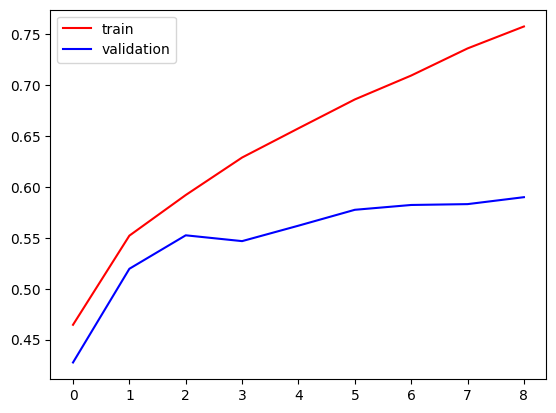

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

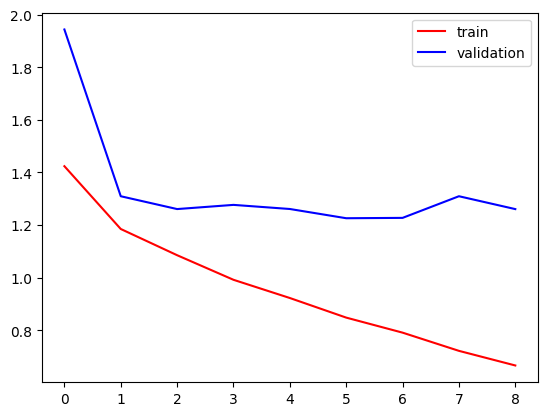

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

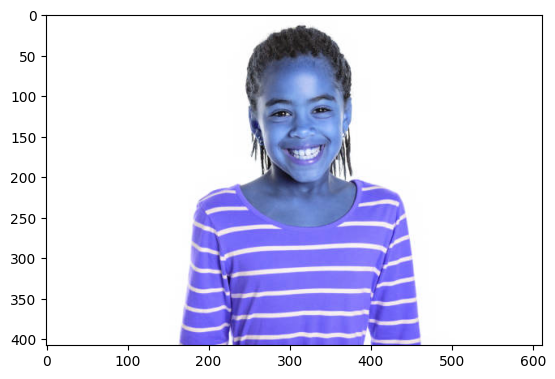

In [18]:
# testing
import cv2
test_img = cv2.imread('/content/happy.jpg')
plt.imshow(test_img)

In [19]:
test_img = cv2.resize(test_img,(224,224))
test_input = test_img.reshape((1,224,224,3))

In [20]:
model.predict(test_input)

1/1 [==============================] - 2s 2s/step


array([[7.56822934e-04, 2.14367537e-04, 1.89075708e-01, 4.62442547e-01,
        1.04269065e-01, 2.39633635e-01, 3.60790873e-03]], dtype=float32)

In [21]:
import numpy as np

# Assuming you have a list of class labels
class_labels = ['Angry', 'Disgust', 'Fear','Happy', 'Neutral', 'Sad', 'Surprise']

# Get the predicted probabilities
predicted_probabilities = model.predict(test_input)

# Get the index of the class with the highest probability
predicted_class_index = np.argmax(predicted_probabilities)

# Map the index to the corresponding class label
predicted_class_label = class_labels[predicted_class_index]

print("Predicted class label:", predicted_class_label)


1/1 [==============================] - 0s 38ms/step
Predicted class label: Happy


In [17]:
# Save model architecture as JSON
model_json = model.to_json()
with open("emotionClassifier_model.json", "w") as json_file:
    json_file.write(model_json)

# Save model weights
model.save_weights("emotionClassifier_model_weights.h5")

In [ ]:
# Load JSON and create model
with open("emotionClassifier_model.json", "r") as json_file:
    loaded_model_json = json_file.read()
loaded_model = tf.keras.models.model_from_json(loaded_model_json)

# Load weights into new model
loaded_model.load_weights("emotionClassifier_model_weights.h5")